In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD, Adam, RMSprop,Adagrad,Adadelta,Adamax,Nadam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
print("The shape of Xtrain_images is ",x_train.shape)
print("The shape of Xtrain_labels is ",x_train.shape)
print("The shape of Ytrain_images is ",y_train.shape)

print("The shape of Xtest_images is ",x_test.shape)
print("The length of Xtest_labels is ",len(x_test))
y_train[0]

The shape of Xtrain_images is  (60000, 28, 28)
The shape of Xtrain_labels is  (60000, 28, 28)
The shape of Ytrain_images is  (60000,)
The shape of Xtest_images is  (10000, 28, 28)
The length of Xtest_labels is  10000


9

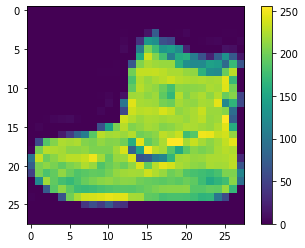

In [3]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.gca().grid(False)
plt.show()

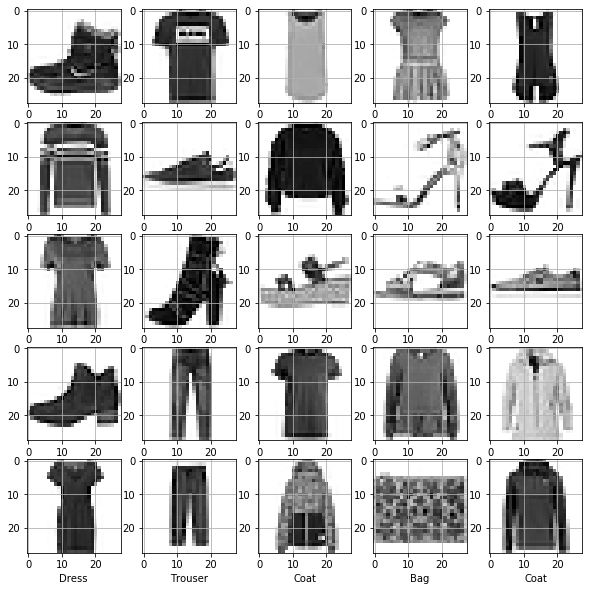

In [4]:
plt.figure(figsize=(10,10))
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid('off')
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [5]:

x_train = (x_train - x_train.min())/(x_train.max() - x_train.min()).astype('float32')
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min()).astype('float32')
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
y_train = to_categorical(y_train, 10) #輸出10種
y_test= to_categorical(y_test, 10)

# 第一個

In [6]:
model_1 = Sequential()

model_1.add(Dense(10, input_dim=784, activation='relu'))


model_1.add(Dense(10, activation='relu'))


model_1.add(Dense(10, activation='softmax'))


model_1.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_1.summary()

model_1_history = model_1.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 0s - loss: 0.0886 - accuracy: 0.2124 - val_loss: 0.0867 - val_accuracy: 0.2358
Epoch 2/20
48000/48000 - 0s - loss: 0.0841 - accuracy: 0.2577 - val_loss: 0.0812 - val_accuracy: 0.3406
Epoch 3/20
48000/48000 - 0s - loss: 0.0755 - accuracy: 0.4187 - val_loss: 0.0678 - val_accuracy: 0.4588
Epoch 4/20
48000/48000

# 二

In [7]:
model_2 = Sequential()
model_2.add(Dense(10, input_dim=784, activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(10, activation='softmax'))


model_2.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_2.summary()

model_2_history = model_1.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 0s - loss: 0.0248 - accuracy: 0.8318 - val_loss: 0.0257 - val_accuracy: 0.8232
Epoch 2/20
48000/48000 - 0s - loss: 0.0245 - accuracy: 0.8332 - val_loss: 0.0247 - val_accuracy:

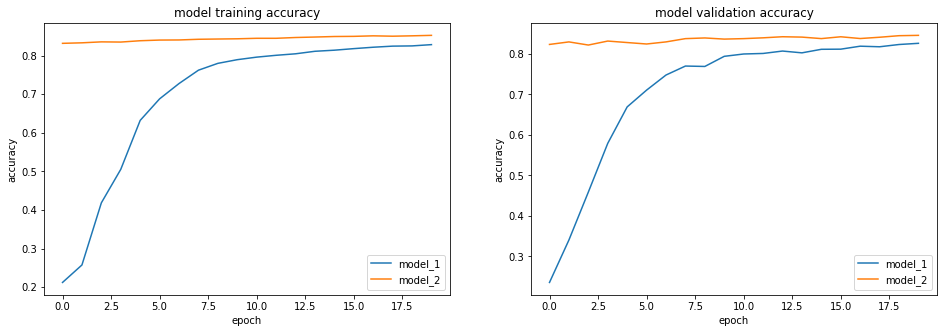

In [8]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_1_history.history["accuracy"])
plt.plot(model_2_history.history["accuracy"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_1_history.history["val_accuracy"])
plt.plot(model_2_history.history["val_accuracy"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")

plt.show()

# 三

In [9]:
model_3 = Sequential()


model_3.add(Dense(20, input_dim=784, activation='relu'))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_3.summary()

model_3_history = model_1.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_8 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 0s - loss: 0.0217 - accuracy: 0.8525 - val_loss: 0.0228 - val_accuracy: 0.8428
Epoch 2/20
48000/48000 - 0s - loss: 0.0215 - accuracy: 0.8550 - val_loss: 0.0222 - val_accuracy: 0.8482
Epoch 3/20
48000/48000 - 0s - loss: 0.0215 - accuracy: 0.8547 - val_loss: 0.0230 - val_accuracy: 0.8390
Epoch 4/20
48000/4

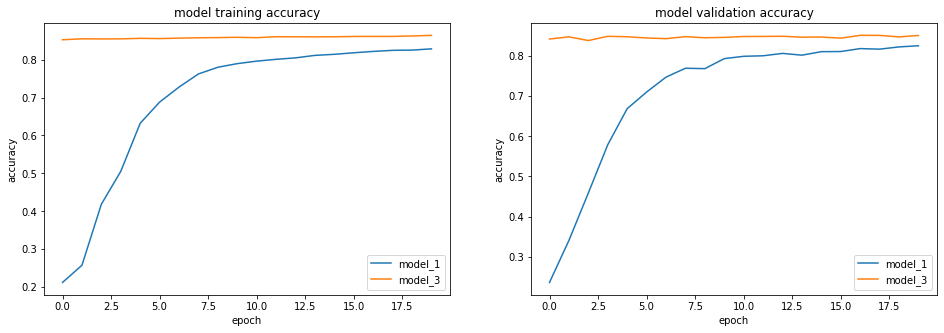

In [10]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_1_history.history["accuracy"])
plt.plot(model_3_history.history["accuracy"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_3"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_1_history.history["val_accuracy"])
plt.plot(model_3_history.history["val_accuracy"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_3"], loc = "best")

plt.show()

# 四

In [11]:
# relu
model_4_relu_history = model_3_history

# sigmoid
model_4_sigmoid = Sequential()
model_4_sigmoid.add(Dense(20, input_dim=784, activation='sigmoid'))
model_4_sigmoid.add(Dense(20, activation='sigmoid'))
model_4_sigmoid.add(Dense(10, activation='softmax'))
model_4_sigmoid.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_4_sigmoid.summary()
model_4_sigmoid_history = model_4_sigmoid.fit(x_train, y_train, batch_size=500, epochs=20,
                          validation_split=0.2,
                         verbose = 2, shuffle = True)

# tanh
model_4_tanh = Sequential()
model_4_tanh.add(Dense(20, input_dim=784, activation='tanh'))
model_4_tanh.add(Dense(20, activation='tanh'))
model_4_tanh.add(Dense(10, activation='softmax'))
model_4_tanh.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_4_tanh.summary()
model_4_tanh_history = model_4_tanh.fit(x_train, y_train, batch_size=500, epochs=20,
                          validation_split=0.2,
                         verbose = 2, shuffle = True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 1s - loss: 0.0907 - accuracy: 0.0719 - val_loss: 0.0902 - val_accuracy: 0.0729
Epoch 2/20
48000/48000 - 0s - loss: 0.0900 - accuracy: 0.0837 - val_loss: 0.0898 - val_accuracy: 0.1156
Epoch 3/20
48000/48000 - 0s - loss: 0.0897 - accuracy: 0.1689 - val_loss: 0.0895 - val_accuracy: 0.2397
Epoch 4/20
48000/4

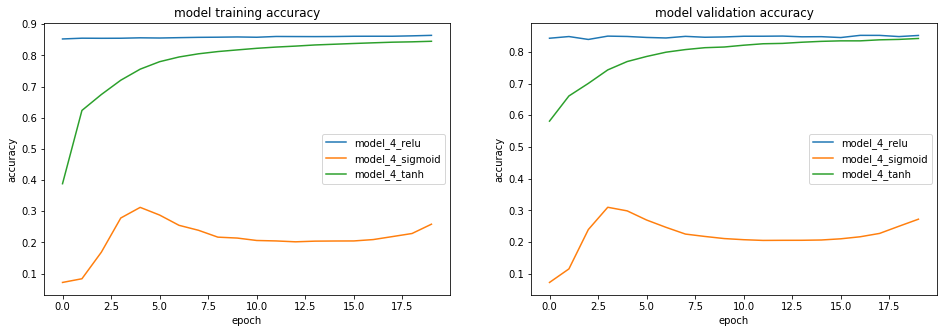

In [12]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_4_relu_history.history["accuracy"])
plt.plot(model_4_sigmoid_history.history["accuracy"])
plt.plot(model_4_tanh_history.history["accuracy"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_4_relu", "model_4_sigmoid", "model_4_tanh"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_4_relu_history.history["val_accuracy"])
plt.plot(model_4_sigmoid_history.history["val_accuracy"])
plt.plot(model_4_tanh_history.history["val_accuracy"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_4_relu", "model_4_sigmoid", "model_4_tanh"], loc = "best")

plt.show()

# 五

In [13]:
# mean_squared_error
model_5_mse_history = model_4_relu_history

# mean_absolute_error
model_5_mae = Sequential()
model_5_mae.add(Dense(20, input_dim=784, activation='relu'))
model_5_mae.add(Dense(20, activation='relu'))
model_5_mae.add(Dense(10, activation='softmax'))
model_5_mae.compile(loss='mae', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_mae.summary()
model_5_mae_history = model_5_mae.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)

# mean_absolute_percentage_error
model_5_mape = Sequential()
model_5_mape.add(Dense(20, input_dim=784, activation='relu'))
model_5_mape.add(Dense(20, activation='relu'))
model_5_mape.add(Dense(10, activation='softmax'))
model_5_mape.compile(loss='mape', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_mape.summary()
model_5_mape_history = model_5_mape.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)

# mean_squared_logarithmic_error
model_5_msle = Sequential()
model_5_msle.add(Dense(20, input_dim=784, activation='relu'))
model_5_msle.add(Dense(20, activation='relu'))
model_5_msle.add(Dense(10, activation='softmax'))
model_5_msle.compile(loss='msle', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_msle.summary()
model_5_msle_history = model_5_msle.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 0s - loss: 0.1629 - accuracy: 0.2389 - val_loss: 0.1363 - val_accuracy: 0.3754
Epoch 2/20
48000/48000 - 0s - loss: 0.1297 - accuracy: 0.3688 - val_loss: 0.1245 - val_accuracy: 0.3813
Epoch 3/20
48000/48000 - 0s - loss: 0.1228 - accuracy: 0.4111 - val_loss: 0.1165 - val_accuracy: 0.4940
Epoch 4/20
48000/4

Epoch 14/20
48000/48000 - 0s - loss: 0.0148 - accuracy: 0.7928 - val_loss: 0.0147 - val_accuracy: 0.7952
Epoch 15/20
48000/48000 - 0s - loss: 0.0145 - accuracy: 0.7981 - val_loss: 0.0144 - val_accuracy: 0.7990
Epoch 16/20
48000/48000 - 0s - loss: 0.0142 - accuracy: 0.8041 - val_loss: 0.0141 - val_accuracy: 0.8037
Epoch 17/20
48000/48000 - 0s - loss: 0.0139 - accuracy: 0.8075 - val_loss: 0.0139 - val_accuracy: 0.8073
Epoch 18/20
48000/48000 - 0s - loss: 0.0136 - accuracy: 0.8118 - val_loss: 0.0137 - val_accuracy: 0.8100
Epoch 19/20
48000/48000 - 0s - loss: 0.0134 - accuracy: 0.8155 - val_loss: 0.0135 - val_accuracy: 0.8073
Epoch 20/20
48000/48000 - 0s - loss: 0.0132 - accuracy: 0.8193 - val_loss: 0.0133 - val_accuracy: 0.8131


In [14]:
# hinge
model_5_hinge = Sequential()
model_5_hinge.add(Dense(20, input_dim=784))
model_5_hinge.add(Dense(20, input_dim=784, activation='relu'))
model_5_hinge.add(Dense(20, activation='relu'))
model_5_hinge.add(Dense(10, activation='softmax'))
model_5_hinge.compile(loss='hinge', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_hinge.summary()
model_5_hinge_history = model_5_hinge.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)

# kullback_leibler_divergence
model_5_kld = Sequential()
model_5_kld.add(Dense(20, input_dim=784))
model_5_kld.add(Dense(20, input_dim=784, activation='relu'))
model_5_kld.add(Dense(20, activation='relu'))
model_5_kld.add(Dense(10, activation='softmax'))
model_5_kld.compile(loss='kullback_leibler_divergence', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_kld.summary()
model_5_kld_history = model_5_kld.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)


# kullback_leibler_divergence
model_5_entropy = Sequential()
model_5_entropy.add(Dense(20, input_dim=784))
model_5_entropy.add(Dense(20, input_dim=784, activation='relu'))
model_5_entropy.add(Dense(20, activation='relu'))
model_5_entropy.add(Dense(10, activation='softmax'))
model_5_entropy.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_entropy.summary()
model_5_entropy_history = model_5_entropy.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_26 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_27 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                210       
Total params: 16,750
Trainable params: 16,750
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 1s - loss: 1.0627 - accuracy: 0.2739 - val_loss: 1.0317 - val_accuracy: 0.4548
Epoch 2/20
48000/48000 - 0s - loss: 1.0153 - accuracy: 0.4669 - val_loss: 1.0059 - val_accurac

Epoch 13/20
48000/48000 - 0s - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3030 - val_accuracy: 0.0983
Epoch 14/20
48000/48000 - 0s - loss: 2.3028 - accuracy: 0.1019 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 15/20
48000/48000 - 0s - loss: 2.3029 - accuracy: 0.0996 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 16/20
48000/48000 - 0s - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1013
Epoch 17/20
48000/48000 - 0s - loss: 2.3029 - accuracy: 0.0980 - val_loss: 2.3029 - val_accuracy: 0.0983
Epoch 18/20
48000/48000 - 0s - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 19/20
48000/48000 - 0s - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1027
Epoch 20/20
48000/48000 - 0s - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.0957


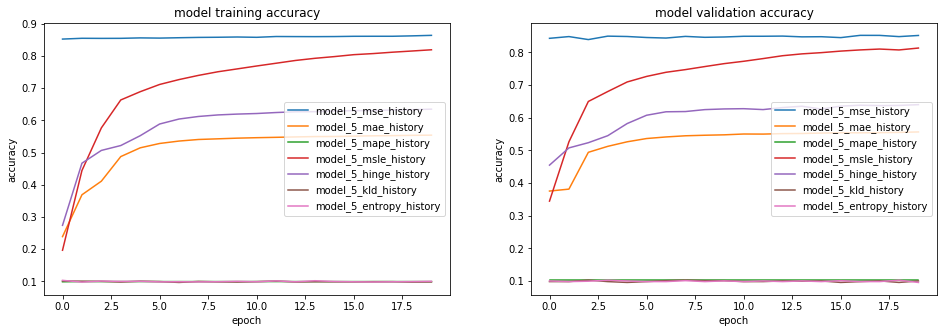

In [15]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_5_mse_history.history["accuracy"])
plt.plot(model_5_mae_history.history["accuracy"])
plt.plot(model_5_mape_history.history["accuracy"])
plt.plot(model_5_msle_history.history["accuracy"])
plt.plot(model_5_hinge_history.history["accuracy"])
plt.plot(model_5_kld_history.history["accuracy"])
plt.plot(model_5_entropy_history.history["accuracy"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_5_mse_history", "model_5_mae_history", "model_5_mape_history", "model_5_msle_history", "model_5_hinge_history", "model_5_kld_history","model_5_entropy_history"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_5_mse_history.history["val_accuracy"])
plt.plot(model_5_mae_history.history["val_accuracy"])
plt.plot(model_5_mape_history.history["val_accuracy"])
plt.plot(model_5_msle_history.history["val_accuracy"])
plt.plot(model_5_hinge_history.history["val_accuracy"])
plt.plot(model_5_kld_history.history["val_accuracy"])
plt.plot(model_5_entropy_history.history["val_accuracy"])

plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_5_mse_history", "model_5_mae_history", "model_5_mape_history", "model_5_msle_history", "model_5_hinge_history", "model_5_kld_history","model_5_entropy_history"], loc = "best")

plt.show()


In [16]:
model_5_hinge = Sequential()
model_5_hinge.add(Dense(20, input_dim=784))
model_5_hinge.add(Dense(20, input_dim=784, activation='relu'))
model_5_hinge.add(Dense(20, activation='relu'))
model_5_hinge.add(Dense(10, activation='softmax'))
model_5_hinge.compile(loss='hinge', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model_5_hinge.summary()
model_5_hinge_history = model_5_hinge.fit(x_train, y_train, batch_size=500, epochs=20,
                        validation_split=0.2,
                         verbose = 2, shuffle = True)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_38 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_39 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                210       
Total params: 16,750
Trainable params: 16,750
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 1s - loss: 1.0665 - accuracy: 0.2078 - val_loss: 1.0485 - val_accuracy: 0.3128
Epoch 2/20
48000/48000 - 0s - loss: 1.0263 - accuracy: 0.4375 - val_loss: 1.0102 - val_accura

# 總結

In [18]:
model_adam = Sequential()
model_adam.add(Dense(10, input_dim=784, activation='relu'))
model_adam.add(Dense(10, activation='relu'))
model_adam.add(Dense(10, activation='softmax'))
model_adam.compile(loss='mse', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=['accuracy'])
model_adam.summary()
model_adam_history = model_adam.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)



model_RMSprop = Sequential()
model_RMSprop.add(Dense(10, input_dim=784, activation='relu'))
model_RMSprop.add(Dense(10, activation='relu'))
model_RMSprop.add(Dense(10, activation='softmax'))
model_RMSprop.compile(loss='mse', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
model_RMSprop.summary()
model_RMSprop_history = model_f.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)


model_Adagrad = Sequential()
model_Adagrad.add(Dense(10, input_dim=784, activation='relu'))
model_Adagrad.add(Dense(10, activation='relu'))
model_Adagrad.add(Dense(10, activation='softmax'))
model_Adagrad.compile(loss='mse', optimizer=Adagrad(), metrics=['accuracy'])
model_Adagrad.summary()
model_Adagrad_history = model_f.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)

model_Adadelta = Sequential()
model_Adadelta.add(Dense(10, input_dim=784, activation='relu'))
model_Adadelta.add(Dense(10, activation='relu'))
model_Adadelta.add(Dense(10, activation='softmax'))
model_Adadelta.compile(loss='mse', optimizer=Adadelta(), metrics=['accuracy'])
model_Adadelta.summary()
model_Adadelta_history = model_f.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)



model_Adamax = Sequential()
model_Adamax.add(Dense(10, input_dim=784, activation='relu'))
model_Adamax.add(Dense(10, activation='relu'))
model_Adamax.add(Dense(10, activation='softmax'))
model_Adamax.compile(loss='mse', optimizer=Adamax(), metrics=['accuracy'])
model_Adamax.summary()
model_Adamax_history = model_f.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)



model_Nadam = Sequential()
model_Nadam.add(Dense(10, input_dim=784, activation='relu'))
model_Nadam.add(Dense(10, activation='relu'))
model_Nadam.add(Dense(10, activation='softmax'))
model_Nadam.compile(loss='mse', optimizer=Nadam(), metrics=['accuracy'])
model_Nadam.summary()
model_Nadam_history = model_f.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=20,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_46 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 1s - loss: 0.0776 - accuracy: 0.3507 - val_loss: 0.0593 - val_accuracy: 0.6181
Epoch 2/20
48000/48000 - 0s - loss: 0.0452 - accuracy: 0.7031 - val_loss: 0.0385 - val_accuracy: 0.7397
Epoch 3/20
48000/48000 - 0s - loss: 0.0353 - accuracy: 0.7559 - val_loss: 0.0320 - val_accuracy: 0.7757
Epoch 4/20
48000/48

NameError: name 'model_f' is not defined

In [ ]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_adam_history.history["accuracy"])
plt.plot(model_RMSprop_history.history["accuracy"])
plt.plot(model_Adagrad_history.history["accuracy"])
plt.plot(model_Adadelta_history.history["accuracy"])
plt.plot(model_Adamax_history.history["accuracy"])
plt.plot(model_Nadam_history.history["accuracy"])


plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_adam_history", "model_RMSprop_history", "model_Adagrad_history", "model_Adadelta_history", "model_Adamax_history", "model_Nadam_history"], loc = "best")

ax2 = fig.add_subplot(1,2,2)
plt.plot(model_adam_history.history["val_accuracy"])
plt.plot(model_RMSprop_history.history["val_accuracy"])
plt.plot(model_Adagrad_history.history["val_accuracy"])
plt.plot(model_Adadelta_history.history["val_accuracy"])
plt.plot(model_Adamax_history.history["val_accuracy"])
plt.plot(model_Nadam_history.history["val_accuracy"])


plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_adam_history", "model_RMSprop_history", "model_Adagrad_history", "model_Adadelta_history", "model_Adamax_history", "model_Nadam_history"], loc = "best")

plt.show()


# 合併

In [19]:
model_f = Sequential()
model_f.add(Dense(20, input_dim=784, activation='relu'))
model_f.add(BatchNormalization())
model_f.add(Dense(20, activation='relu'))
model_f.add(BatchNormalization())
model_f.add(Dense(10, activation='softmax'))
model_f.compile(loss='mse', optimizer=Nadam(), metrics=['accuracy'])
model_f.summary()
model_f_history = model_f.fit(x_train, 
                              y_train, 
                              batch_size=500, 
                              epochs=150,
                              validation_split=0.2,
                              verbose = 2, 
                              shuffle = True,
#                                  callbacks= [
                   
#                           EarlyStopping(patience = 1, 
#                                         verbose=2,  
                                        
#                                         monitor='val_accuracy')
#                           ]
                          )


# model_f_2 = Sequential()
# model_f_2.add(Dense(20, input_dim=784, activation='relu'))
# model_f_2.add(BatchNormalization())
# model_f_2.add(Dropout(0.1))
# model_f_2.add(Dense(20, activation='relu'))
# model_f_2.add(BatchNormalization())
# model_f_2.add(Dropout(0.1))
# model_f_2.add(Dense(10, activation='softmax'))
# model_f_2.compile(loss='mse', optimizer=Adam(), metrics=['accuracy'])
# model_f_2.summary()
# model_f_2_history = model_f_2.fit(x_train, 
#                               y_train, 
#                               batch_size=500, 
#                               epochs=150,
#                               validation_split=0.2,
#                               verbose = 2, 
#                               shuffle = True,
# #                                 callbacks= [
                       
# #                           EarlyStopping(patience = 1, 
# #                                         verbose=2, 
                                       
# #                                         monitor='val_accuracy')
# #                           ]
#                               )

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 20)                15700     
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
dense_51 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_52 (Dense)             (None, 10)                210       
Total params: 16,490
Trainable params: 16,410
Non-trainable params: 80
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 - 1s - loss: 0.0464 - accuracy: 0.6701 -

Epoch 69/150
48000/48000 - 0s - loss: 0.0116 - accuracy: 0.9267 - val_loss: 0.0212 - val_accuracy: 0.8643
Epoch 70/150
48000/48000 - 0s - loss: 0.0115 - accuracy: 0.9294 - val_loss: 0.0213 - val_accuracy: 0.8648
Epoch 71/150
48000/48000 - 0s - loss: 0.0116 - accuracy: 0.9279 - val_loss: 0.0209 - val_accuracy: 0.8618
Epoch 72/150
48000/48000 - 0s - loss: 0.0115 - accuracy: 0.9276 - val_loss: 0.0210 - val_accuracy: 0.8628
Epoch 73/150
48000/48000 - 0s - loss: 0.0115 - accuracy: 0.9289 - val_loss: 0.0216 - val_accuracy: 0.8621
Epoch 74/150
48000/48000 - 0s - loss: 0.0114 - accuracy: 0.9293 - val_loss: 0.0207 - val_accuracy: 0.8658
Epoch 75/150
48000/48000 - 0s - loss: 0.0113 - accuracy: 0.9303 - val_loss: 0.0207 - val_accuracy: 0.8666
Epoch 76/150
48000/48000 - 0s - loss: 0.0113 - accuracy: 0.9295 - val_loss: 0.0206 - val_accuracy: 0.8668
Epoch 77/150
48000/48000 - 0s - loss: 0.0113 - accuracy: 0.9297 - val_loss: 0.0208 - val_accuracy: 0.8664
Epoch 78/150
48000/48000 - 0s - loss: 0.0112 -

Epoch 146/150
48000/48000 - 0s - loss: 0.0098 - accuracy: 0.9405 - val_loss: 0.0229 - val_accuracy: 0.8566
Epoch 147/150
48000/48000 - 0s - loss: 0.0097 - accuracy: 0.9424 - val_loss: 0.0229 - val_accuracy: 0.8594
Epoch 148/150
48000/48000 - 0s - loss: 0.0097 - accuracy: 0.9418 - val_loss: 0.0229 - val_accuracy: 0.8584
Epoch 149/150
48000/48000 - 0s - loss: 0.0097 - accuracy: 0.9422 - val_loss: 0.0234 - val_accuracy: 0.8542
Epoch 150/150
48000/48000 - 0s - loss: 0.0098 - accuracy: 0.9417 - val_loss: 0.0230 - val_accuracy: 0.8582


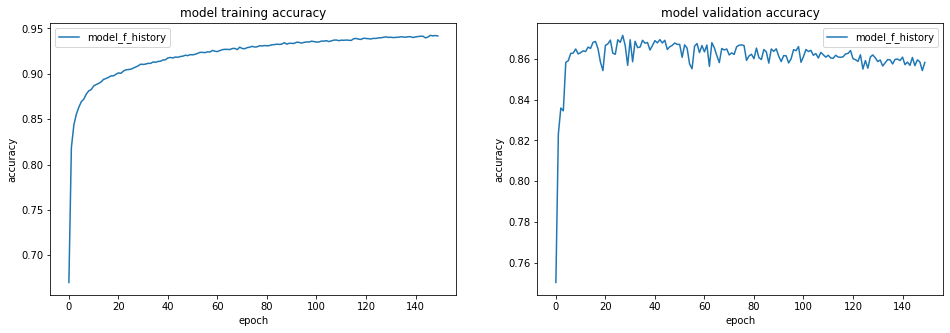

In [20]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
plt.plot(model_f_history.history["accuracy"])
#plt.plot(model_f_2_history.history["accuracy"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_f_history","model_f_history+dropout"])


ax2 = fig.add_subplot(1,2,2)
plt.plot(model_f_history.history["val_accuracy"])
#plt.plot(model_f_2_history.history["val_accuracy"])
plt.title("model validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_f_history","model_f_history+regulization"])
plt.show()

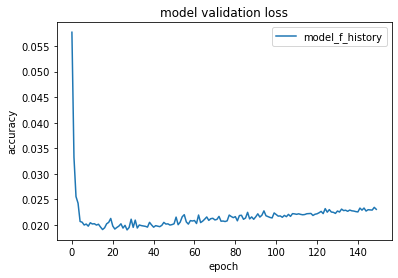

In [21]:
# ax2 = fig.add_subplot(1,2,2)
plt.plot(model_f_history.history["val_loss"])
#plt.plot(model_f_2_history.history["val_loss"])
plt.title("model validation loss")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_f_history","model_f_history+regulization"])
plt.show()

In [22]:
test_loss,test_acc = model_f.evaluate(x_test,y_test)
print('Test Acc:',test_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0246 - accuracy: 0.8492
Test Acc: 0.8492
